In [ ]:
import json, os, sys, cv2
sys.path.append('..')

from modules.process import *
from modules.display import *
from modules.curvature import compute_list_divided_curvature_radii
from modules.helper import *

# 初期設定

In [ ]:
with open('conf.json', 'r') as f:
    conf = json.load(f)
conf

In [5]:
""" Create MyImages instance """
def create_dust_mask(instance):
    dust_mask = instance.dust_mask.copy()
    cv2.circle(dust_mask, (100, 148), 16, color=1, thickness=-1)
    cv2.circle(dust_mask, (523, 305), 13, color=1, thickness=-1)
    cv2.circle(dust_mask, (450, 483), 11, color=1, thickness=-1)
    return dust_mask

instance0 = MyImages()
instance0.load_image(conf['path'])
filename = (os.path.basename(conf['path']).split('.'))[0]

# 画像切り取り

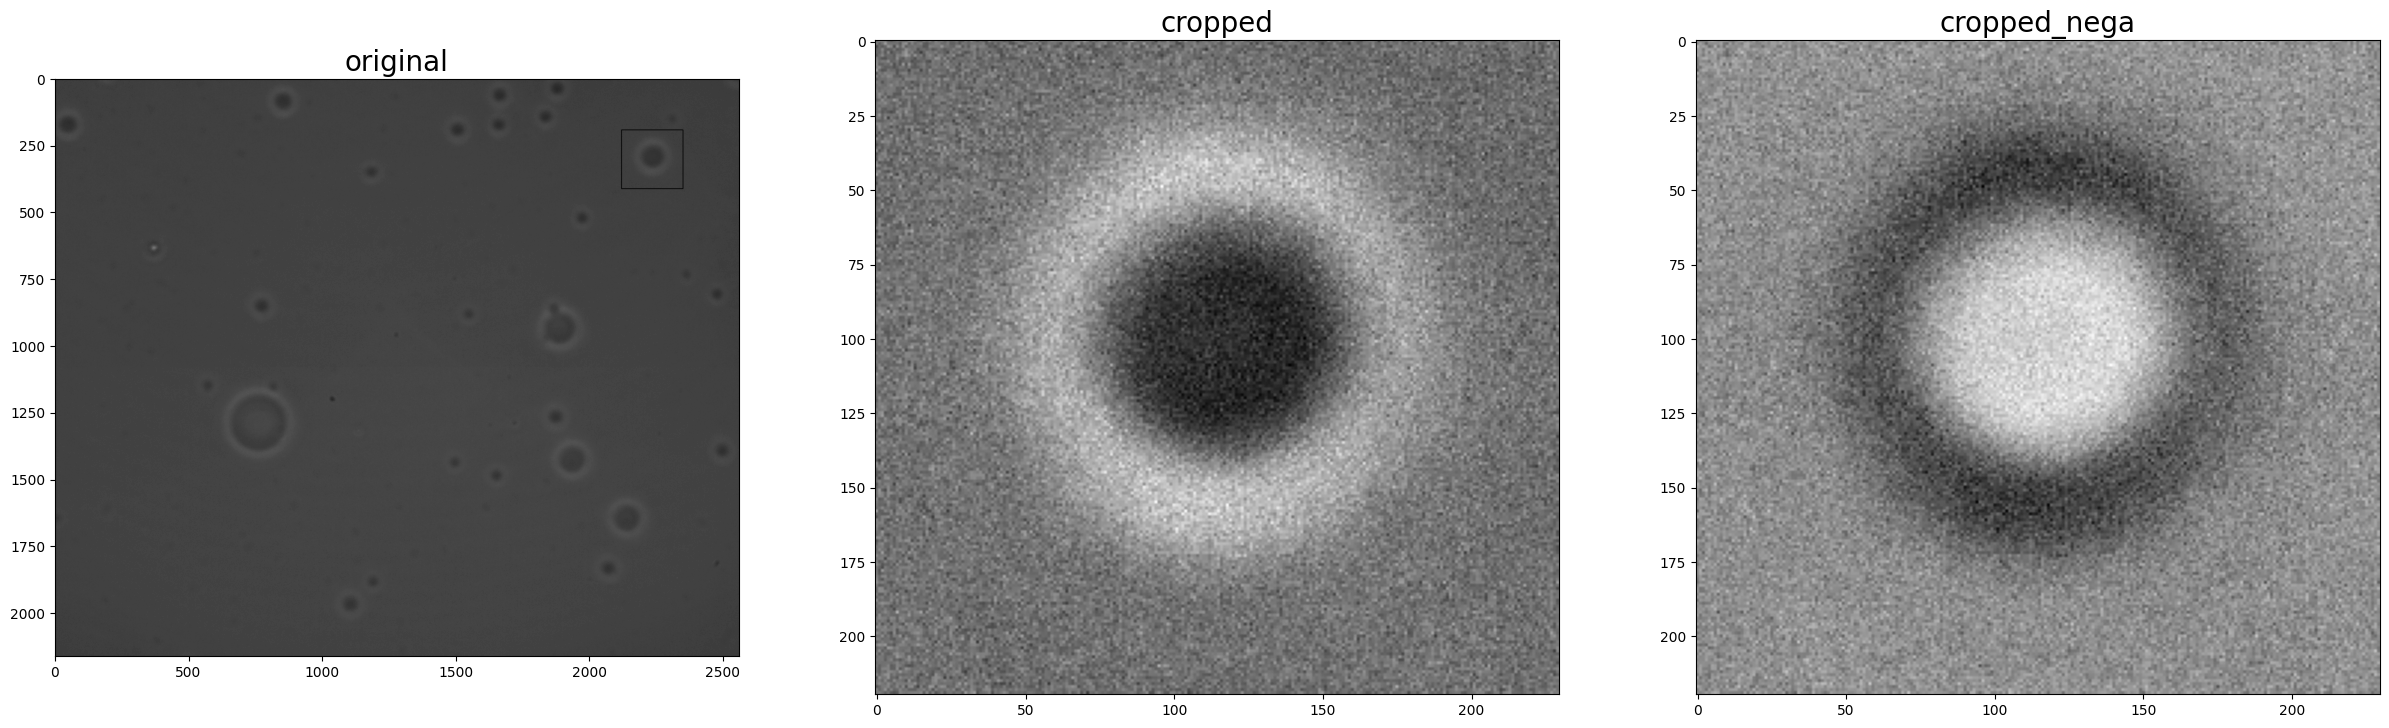

In [ ]:
""" Check crop area """

tmp = instance0.gray_images[0].copy()
xl, xr, yl, yr = conf['crop']
cv2.rectangle(tmp, (xl, yl), (xr, yr), 0, 2)
display_images([tmp, instance0.gray_images[:, yl:yr, xl:xr][0], -instance0.gray_images[:, yl:yr, xl:xr][0]], ['original', 'cropped', 'cropped_nega'])

In [ ]:
""" Execute cropping """

instance = MyImages()
xl, xr, yl, yr = conf['crop']
if conf['negative_image']:
    tmp = instance0.gray_images[:, yl:yr, xl:xr]
    instance.gray_images = [np.max(img) - img for img in tmp]
else:
    instance.gray_images = instance0.gray_images[:, yl:yr, xl:xr]
instance.dust_mask = np.zeros(instance.gray_images[0].shape)

display_stats(instance.gray_images[0])
print(len(instance.gray_images))

{'min': 704, 'max': 1404, 'mean': 1036.2015612648222, 'std': 93.24527552980712, 'median': 1031.0}
189


# 液滴の円近似 (b2d edge detection)

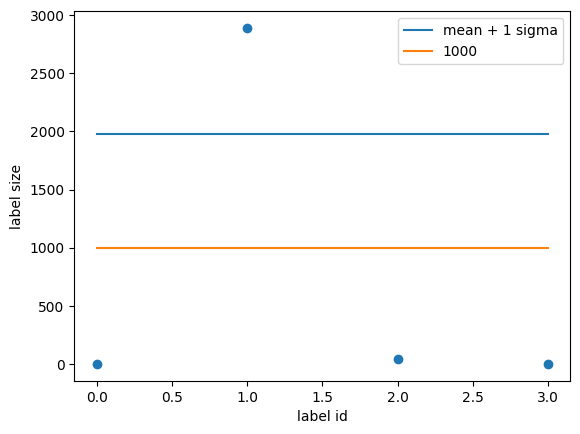

mass center of b2d vectors (116.71124206708976, 111.68540344514959)


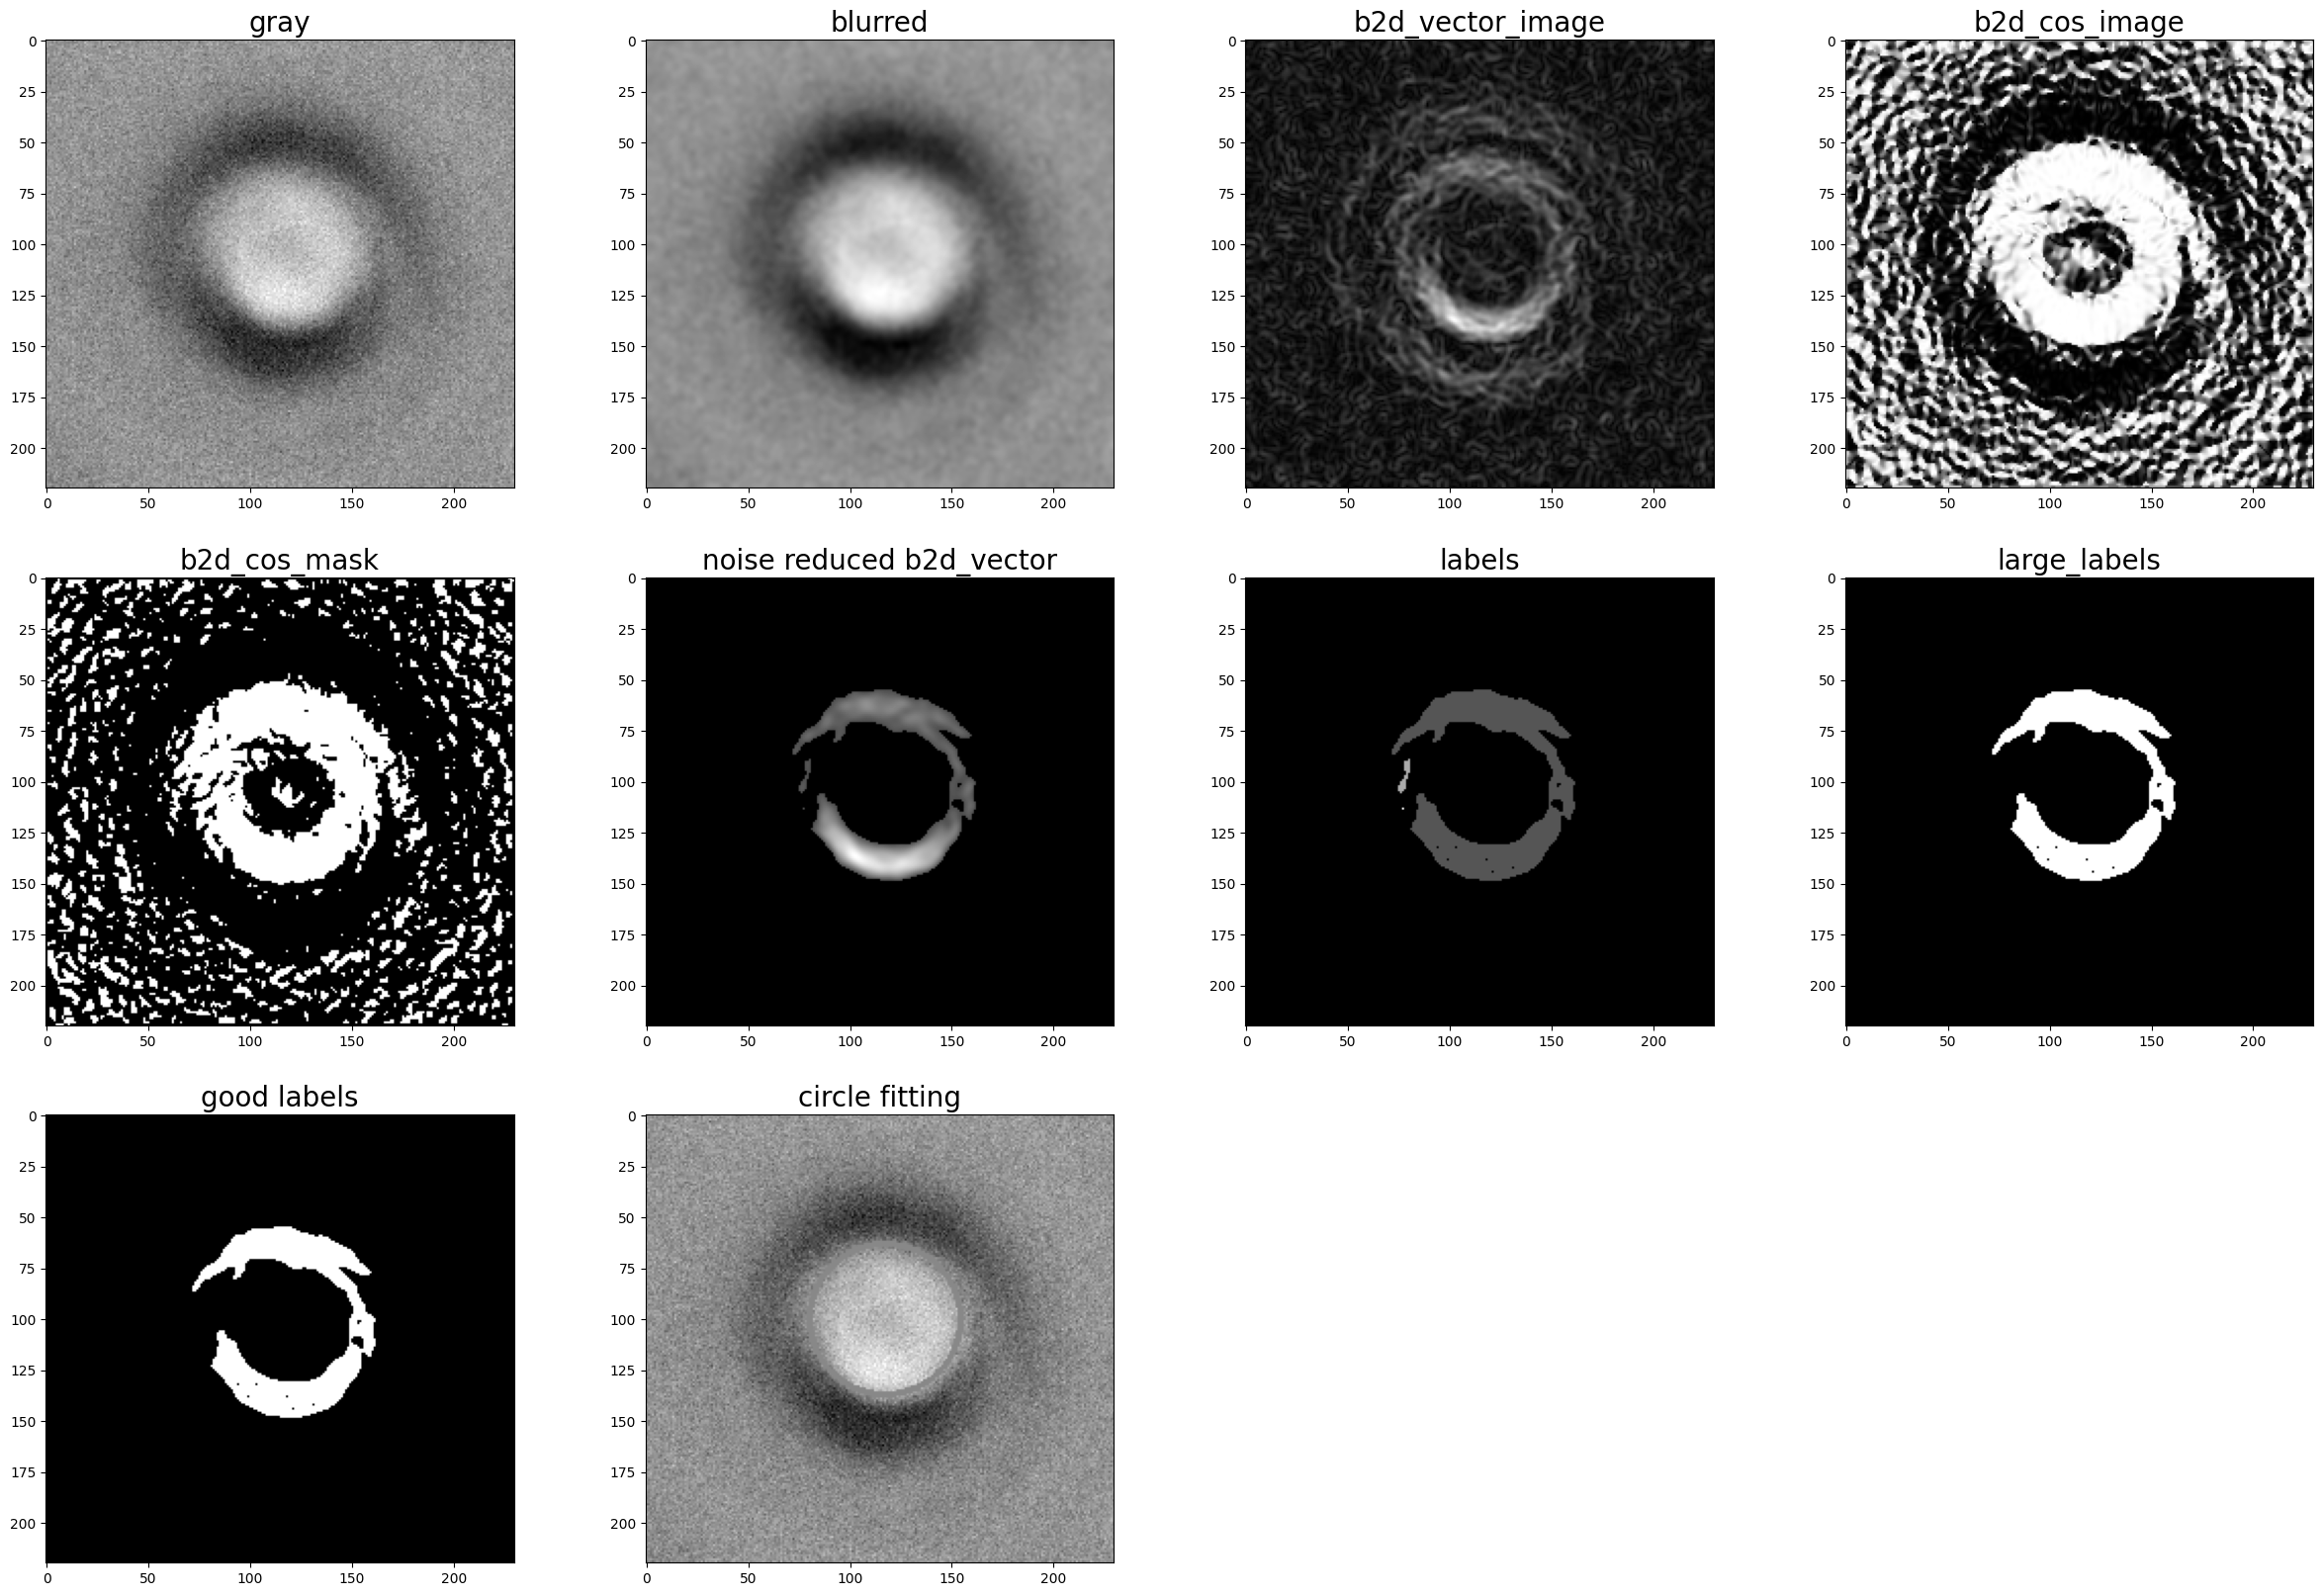

In [ ]:
""" パラメータチューニング用のテストラン """
result_images = test_run(instance, 150, conf)

## run

In [ ]:
list_good_labels, list_arr_circle, list_arr_points = run(instance, range(len(instance.gray_images)), conf)

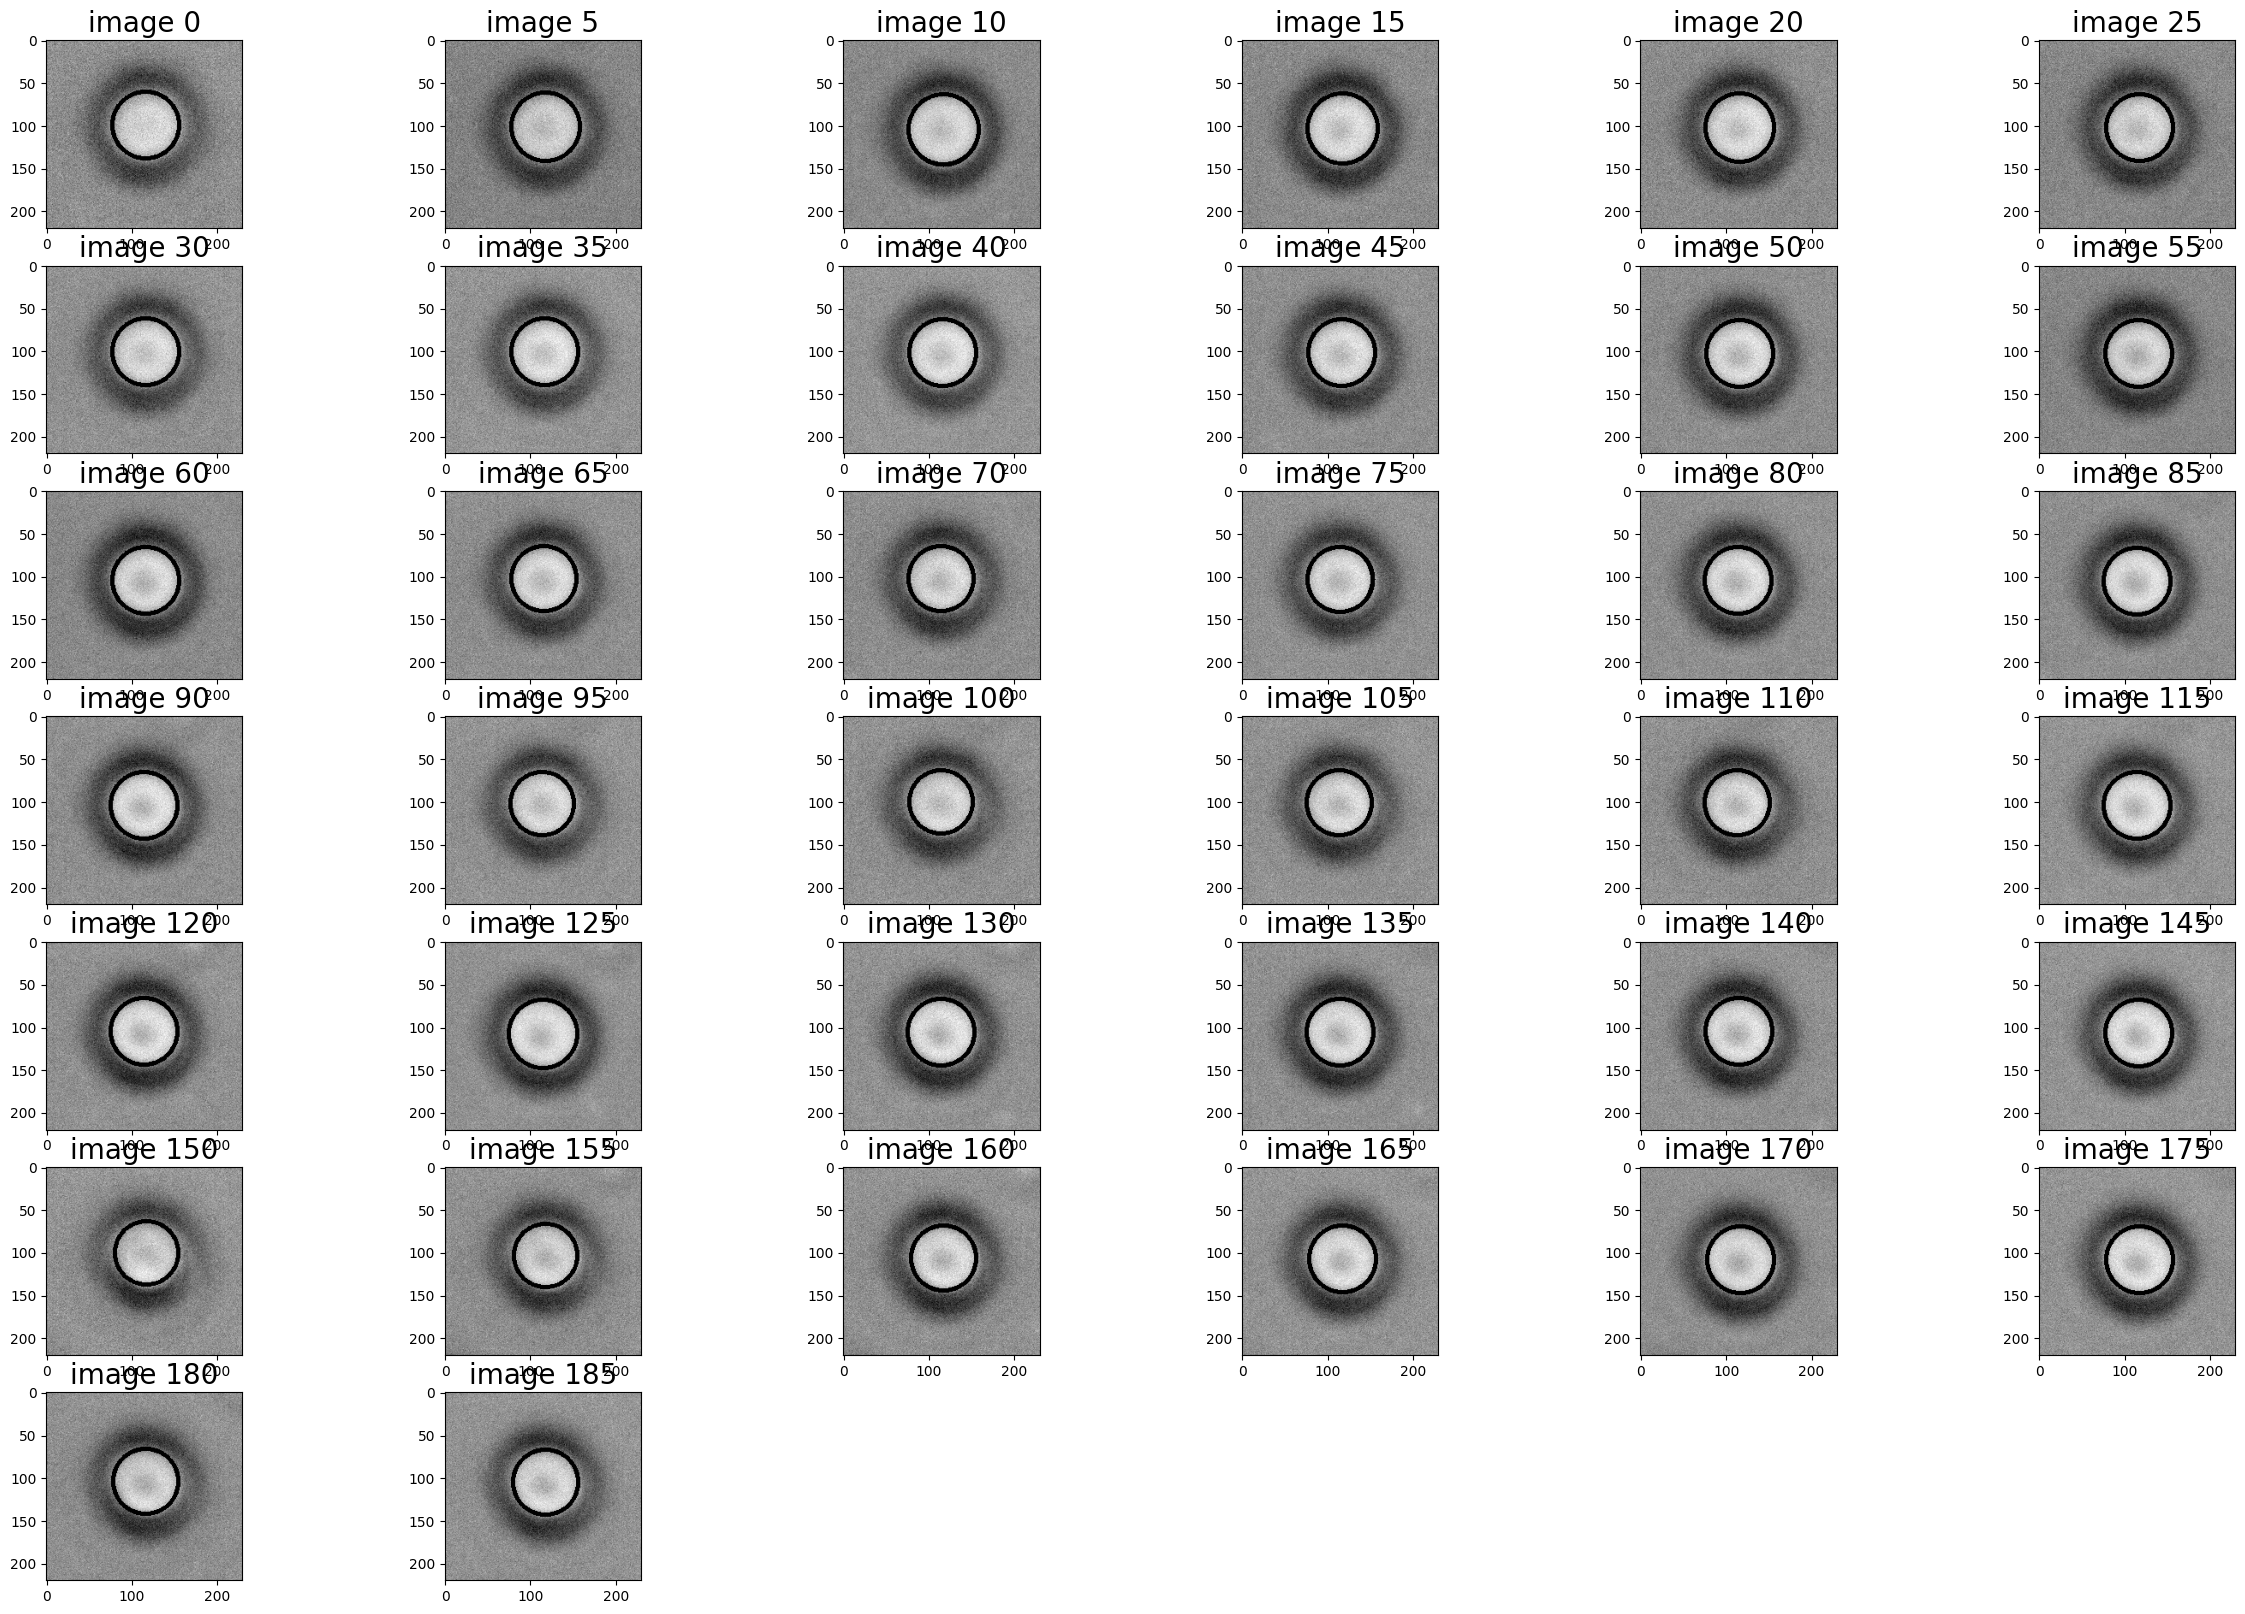

In [ ]:
# display_droplet_radii(list_arr_circle)
display_original_images_with_circles(instance, list_arr_circle, range(0, len(instance.gray_images), 5))

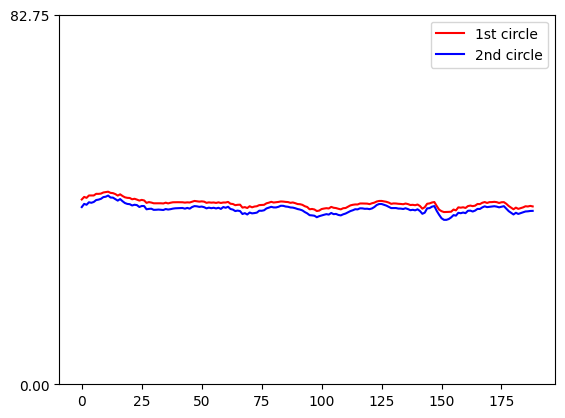

In [ ]:
display_droplet_radii(list_arr_circle)

In [ ]:
save_arr0 = [0] + [arr_circle[0][2] for arr_circle in list_arr_circle]
save_arr1 = [1] + [arr_circle[1][2] for arr_circle in list_arr_circle]
save_as_csv([conf['fps'], conf['scale']], f'../data/crop{conf['crop_id']}_b2d_radii_{filename}.csv')
save_as_csv(save_arr0, f'../data/crop{conf['crop_id']}_b2d_radii_{filename}.csv')
save_as_csv(save_arr1, f'../data/crop{conf['crop_id']}_b2d_radii_{filename}.csv')